In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import sklearn
import cv2 as cv
from PIL import Image

# load all the models

In [4]:
haar=cv.CascadeClassifier('./DATA/haarcascade_frontalface_default.xml')

## Pickle files

In [5]:
mean=pickle.load(open('./model/mean_preprocess.pickle','rb'))
model_svc=pickle.load(open('./model_svm.pickle','rb'))
model_pca=pickle.load(open('./model/pca_50.pickle','rb'))

print("Model loaded successfully")

Model loaded successfully


In [6]:
mean.shape

()

In [8]:
gender_pre=['Male','Female']
font=cv.FONT_HERSHEY_SIMPLEX

In [20]:
def pipeline_model(img,color='rgb'):
    # step - 2 : convert to gray scale
    if color=='bgr':
        gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    else:
        gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    # step - 3: Crop the image using haar cascade classifier
    faces=haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3) #drawing contour or rectangle
        roi=gray[y:y+h,x:x+w] # crop image
        # step - 4: normalization (0-1)
        roi=roi/255.0
        # step - 5: resize image (100,100)
        if roi.shape[1]>100:
            roi_resize=cv.resize(roi,(100,100),cv.INTER_AREA)
        else:
            roi_resize=cv.resize(roi,(100,100),cv.INTER_CUBIC)
        # step - 6: Falttening (1x10000)
        roi_reshape=roi_resize.reshape(1,10000) #1 , -1
        # step - 7: substract with mean
        roi_mean=roi_reshape-mean
        #step - 8: get eigen image
        eigen_image=model_pca.transform(roi_mean)
        #step - 9: pass to ml Model(svm)
        results=model_svc.predict_proba(eigen_image)[0]
        #step - 10: 
        predict= results.argmax() # 0 or 1
        score=results[predict ]
        #step - 11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        print(text)
        cv.putText(img,text,(x,y),font,1,(0,255,0),5)
    return img
 

Male : 0.75


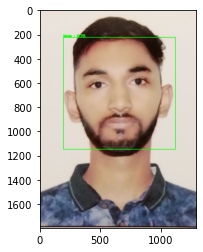

In [21]:
# test data
test_data_path='./DATA/photo.jpg'
color='bgr'
# step - 1 : read image
# img=cv.imread(test_data_path)
img=Image.open(test_data_path)
# step - 2: convert into array
img=np.array(img)
# step -3: pass to pipeline
img=pipeline_model(img)
plt.imshow(img)

# Apply Pipeline to Video


In [ ]:
cap=cv.VideoCapture("Application Layer Track - Practice - GeeksforGeeks_3.ts")
while True:
    ret,frame=cap.read()
    if ret==False:
        break
    frame = pipeline_model(frame,color="bgr")
    cv.imshow('Gender Detector',frame)
    if cv.waitKey(10)==ord('s'): # press s to exit 
        break
cv.destroyAllWindows()
cap.release()

Male : 0.82
Male : 0.83
Male : 0.82
Male : 0.82
Male : 0.89
Male : 0.83
Male : 0.89
Male : 0.84
Male : 0.83
Male : 0.83
Male : 0.84
Male : 0.89
Male : 0.85
Male : 0.86
Male : 0.87
Male : 0.87
Male : 0.88
Male : 0.97
Male : 0.91
Male : 0.96
Male : 0.90
Male : 0.98
Male : 0.90
Male : 0.96
Male : 0.90
Male : 0.96
Male : 0.95
Male : 0.96
Male : 0.98
Male : 0.92
Male : 0.98
Male : 0.94
Male : 0.93
Male : 0.98
Male : 0.94
Male : 0.99
Male : 0.94
Male : 0.98
Male : 0.95
Male : 0.99
Male : 0.95
Male : 0.98
Male : 0.95
Male : 0.98
Male : 0.94
Male : 0.99
Male : 0.93
Male : 0.98
Male : 0.92
Male : 0.98
Male : 0.94
Male : 0.99
Male : 0.93
Male : 0.97
Male : 0.94
Male : 0.95
Male : 0.96
Male : 0.98
Male : 0.94
Male : 0.94
Male : 0.96
Male : 0.91
Male : 0.97
Male : 0.95
Male : 0.94
Male : 0.97
Male : 0.96
Male : 0.92
Male : 0.93
Male : 0.81
Male : 0.92
Male : 0.93
Male : 0.83
Male : 0.94
Male : 0.86
Male : 0.93
Male : 0.98
Male : 0.93
Male : 0.93
Male : 0.94
Male : 0.91
Male : 0.93
Male : 0.94
Male

Male : 0.91
Male : 0.98
Male : 0.92
Male : 0.97
Male : 0.86
Male : 0.98
Male : 0.87
Male : 0.89
Male : 0.90
Male : 0.89
Male : 0.90
Male : 0.89
Male : 0.91
Male : 0.92
Male : 0.90
Male : 0.93
Male : 0.92
Male : 0.91
Male : 0.91
Male : 0.91
Male : 0.92
Male : 0.92
Male : 0.90
Male : 0.91
Male : 0.98
Male : 0.90
Male : 0.97
Male : 0.91
Male : 0.97
Male : 0.90
Male : 0.98
Male : 0.92
Male : 0.98
Male : 0.93
Male : 0.94
Male : 0.93
Male : 0.96
Male : 0.90
Male : 0.94
Male : 0.89
Male : 0.93
Male : 0.93
Male : 0.94
Male : 0.94
Male : 0.91
Male : 0.94
Male : 0.92
Male : 0.90
Male : 0.90
Male : 0.90
Male : 0.88
Male : 0.87
Male : 0.90
Male : 0.89
Male : 0.88
Male : 0.90
Male : 0.91
Male : 0.88
Male : 0.89
Male : 0.90
Male : 0.89
Male : 0.90
Male : 0.98
Male : 0.89
Male : 0.98
Male : 0.90
Male : 0.89
Male : 0.90
Male : 0.96
Male : 0.91
Male : 0.98
Male : 0.87
Male : 0.94
Male : 0.88
Male : 0.99
Male : 0.89
Male : 0.87
Male : 0.99
Male : 0.86
Male : 0.98
Male : 0.88
Male : 0.91
Male : 0.90
Male

Male : 0.94
Male : 0.93
Male : 0.92
Male : 0.87
Male : 0.94
Male : 0.92
Male : 0.90
Male : 0.96
Male : 0.93
Male : 0.95
Male : 0.95
Male : 0.97
Male : 0.95
Male : 0.93
Male : 0.94
Male : 0.95
Male : 0.95
Male : 0.92
Male : 0.95
Male : 0.93
Male : 0.95
Male : 0.95
Male : 0.95
Male : 0.96
Male : 0.97
Male : 0.95
Male : 0.96
Male : 0.95
Male : 0.94
Male : 0.96
Male : 0.94
Male : 0.94
Male : 0.96
Male : 0.95
Male : 0.96
Male : 0.94
Male : 0.94
Male : 0.95
Male : 0.94
Male : 0.95
Male : 0.95
Male : 0.94
Male : 0.94
Male : 0.93
Male : 0.95
Male : 0.94
Male : 0.95
Male : 0.95
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.94
Male : 0.93
Male : 0.93
Male : 0.90
Male : 0.92
Male : 0.90
Male : 0.87
Male : 0.87
Male : 0.88
Male : 0.86
Male : 0.90
Male : 0.88
Male : 0.88
Male : 0.86
Male : 0.87
Male : 0.87
Male : 0.87
Male : 0.86
Male : 0.84
Male : 0.84
Male : 0.87
Male : 0.86
Male : 0.89
Male : 0.93
Male : 0.88
Male : 0.91
Male : 0.91
Male : 0.90
Male